# View Selected Calspec individual SED 

- Author Sylvie Dagoret-Campagne
- Creation : September 30th  2021
- Last verification : December 14th 2021 --> OK

In [1]:
import os
import numpy as np

In [2]:
from astropy.table import Table
from astropy.io import fits

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline

In [4]:
import pysynphot as S

In [5]:
pysynphot_root_path=os.environ['PYSYN_CDBS']
path_sed_calspec=os.path.join(pysynphot_root_path,'calspec')

In [6]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(24,18)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

# Read the Table

In [7]:
t=Table.read('table_summary_allcalspec.fits')
#t=Table.read('table_summary_calspec_hd.fits')  # view only HD type stars

In [8]:
t['magU'].format = "%3.3f" 
t['magB'].format = "%3.3f"  
t['magV'].format = "%3.3f"  
t['magR'].format = "%3.3f"  
t['magI'].format = "%3.3f"  

In [9]:

t['magU'][np.where(t['magU'] > 1000)] = np.nan
t['magB'][np.where(t['magB'] > 1000)] = np.nan
t['magV'][np.where(t['magV'] > 1000)] = np.nan
t['magR'][np.where(t['magR'] > 1000)] = np.nan
t['magI'][np.where(t['magI'] > 1000)] = np.nan

In [10]:
t.show_in_notebook()

idx,OBJNAME,RA,DEC,SP_TYPE,SP_QUAL,magU,magB,magV,magR,magI,FILES
0,109VIR,221.562,1.893,A0IIInn,C,3.690,3.720,3.730,3.660,3.680,109vir_stis_002.fits
1,10LAC,339.815,39.050,O9V,C,3.650,4.670,4.880,4.980,5.190,10lac_stis_005.fits
2,16CYGB,295.455,50.525,--,--,--,--,--,--,--,16cygb_stis_002.fits
3,18SCO,243.905,-8.369,G2Va,B,--,6.150,5.500,--,--,18sco_stis_002.fits
4,HD172167,279.235,38.784,A0Va,C,0.030,0.030,0.030,0.070,0.100,alpha_lyr_stis_010.fits
5,BD11D3759,218.570,-12.520,M3.5V,C,14.041,12.915,11.317,10.093,8.473,bd11d3759_stis_002.fits
6,ETA1DOR,91.539,-66.040,A0V,C,--,5.679,5.690,--,--,eta1dor_stis_002.fits
7,FEIGE110,349.993,-5.166,sdO8VIIIHe5,B,10.360,11.450,11.500,11.970,12.145,feige110_stisnic_008.fits
8,FEIGE34,159.903,43.103,sdOp,D,9.613,10.910,11.140,11.319,11.464,feige34_stis_006.fits
9,FEIGE66,189.348,25.067,sdB1(k),C,9.117,10.260,10.590,10.642,10.809,feige66_002.fits


In [11]:
NBFILES=len(t)

In [12]:
dec=t["DEC"]

In [13]:
index_south_hemisphere=np.where(dec<0)[0]
index_south_hemisphere

array([ 3,  5,  6,  7, 13, 15, 17, 18, 19, 20, 21, 23, 24, 27, 28, 31, 34,
       36, 37, 38, 40, 42, 43, 45, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 73])

In [14]:
# A flag to turn off plotting calspec
# In some cases the flag VISIBILITY may correspond to a flag saying if the star is visible
#FLAG_VISIBILITY= np.array([False] * len(t))
#FLAG_VISIBILITY[index_south_hemisphere]=True

In [15]:
FLAG_VISIBILITY= np.array([True] * len(t))

In [16]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBFILES)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBFILES), alpha=1)

# List of required SED by Marc

In [17]:
#List_OfRequired_SED=[b"HD2811",b"HD009051",b"HD14943",b"WD0308-565",b"WD0320-539",b"C26202",b"HD031128",b"LAMLEP",b"HD37962",
#                     b"MUCOL",b"HD38949",b"2M0559-14",b"ETA1DOR",b"SIRIUS",b"HD60753",b"HD074000",b"HD111980",b"HD115169",
#                     b"WD1327_083",b"BD11D3759",b"HD142331",b"18SCO",b"VB8",b"HD160617",b"HD167060",b"NGC6681-12",b"NGC6681-11",
#                     b"NGC6681-10",b"NGC6681-9",b"NGC6681-8",b"NGC6681-7",b"NGC6681-6",b"NGC6681-5",b"NGC6681-4",b"NGC6681-3",
#                     b"NGC6681-2",b"NGC6681-1",b"GJ7541A",b"HD185975",b"HD200654",b"HD205905",b"FEIGE110"]

In [18]:
List_OfRequired_SED=[b"HD2811",b"HD009051",b"HD14943",b"HD031128",b"LAMLEP",b"HD37962",
                     b"MUCOL",b"HD38949",b"ETA1DOR",b"HD60753",b"HD074000",b"HD111980",b"HD115169",
                     b"BD11D3759",b"HD142331",b"18SCO",b"HD160617",b"HD167060",b"HD185975",b"HD200654",b"HD205905"]

In [19]:
#List_OfRequired_SED=[b'LAMLEP',b'MUCOL',b'ETA1DOR',b'BD11D3759']

#  Plot Fluxes in linear scale

In [20]:
all_objnames=np.array(t["OBJNAME"])

In [21]:
Ntargets=len(List_OfRequired_SED)

In [22]:
count=0
for tag_name in List_OfRequired_SED:
    if tag_name in all_objnames:
        count+=1
        
Ntargets=count

In [23]:
Nrow=Ntargets//2+1
Ncol=2

Warning, 33 of 7206 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:42: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (magU, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:45: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (magR, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:46: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (magI, )))


Warning, 17 of 6234 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:42: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (magU, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:45: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (magR, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:46: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (magI, )))


Warning, 34 of 7206 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:42: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (magU, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:45: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (magR, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:46: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (magI, )))


Warning, 1 of 6256 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:42: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (magU, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:45: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (magR, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:46: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (magI, )))


Warning, 26 of 6260 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:42: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (magU, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:45: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (magR, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:46: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (magI, )))


Warning, 5 of 6262 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:42: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (magU, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:45: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (magR, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:46: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (magI, )))
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:42: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (magU, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:45: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (magR, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:46: UserWarning: Warning: converting a masked element to nan

Warning, 64 of 6262 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:42: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (magU, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:45: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (magR, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:46: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (magI, )))


Warning, 27 of 1933 bins contained negative fluxes; they have been set to zero.
Warning, 62 of 6262 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:42: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (magU, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:45: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (magR, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:46: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (magI, )))


Warning, 27 of 6262 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:42: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (magU, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:45: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (magR, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:46: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (magI, )))
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:42: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (magU, ),


Warning, 46 of 6262 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:42: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (magU, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:45: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (magR, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:46: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (magI, )))


Warning, 28 of 6262 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:42: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (magU, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:45: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (magR, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:46: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (magI, )))
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:42: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (magU, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:45: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (magR, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:46: UserWarning: Warning: converting a masked element to nan

Warning, 9 of 6261 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:42: UserWarning: Warning: converting a masked element to nan.
  r'$mag_u=%2.2f$' % (magU, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:45: UserWarning: Warning: converting a masked element to nan.
  r'$mag_r=%2.2f$' % (magR, ),
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/2238455109.py:46: UserWarning: Warning: converting a masked element to nan.
  r'$mag_i=%2.2f$' % (magI, )))


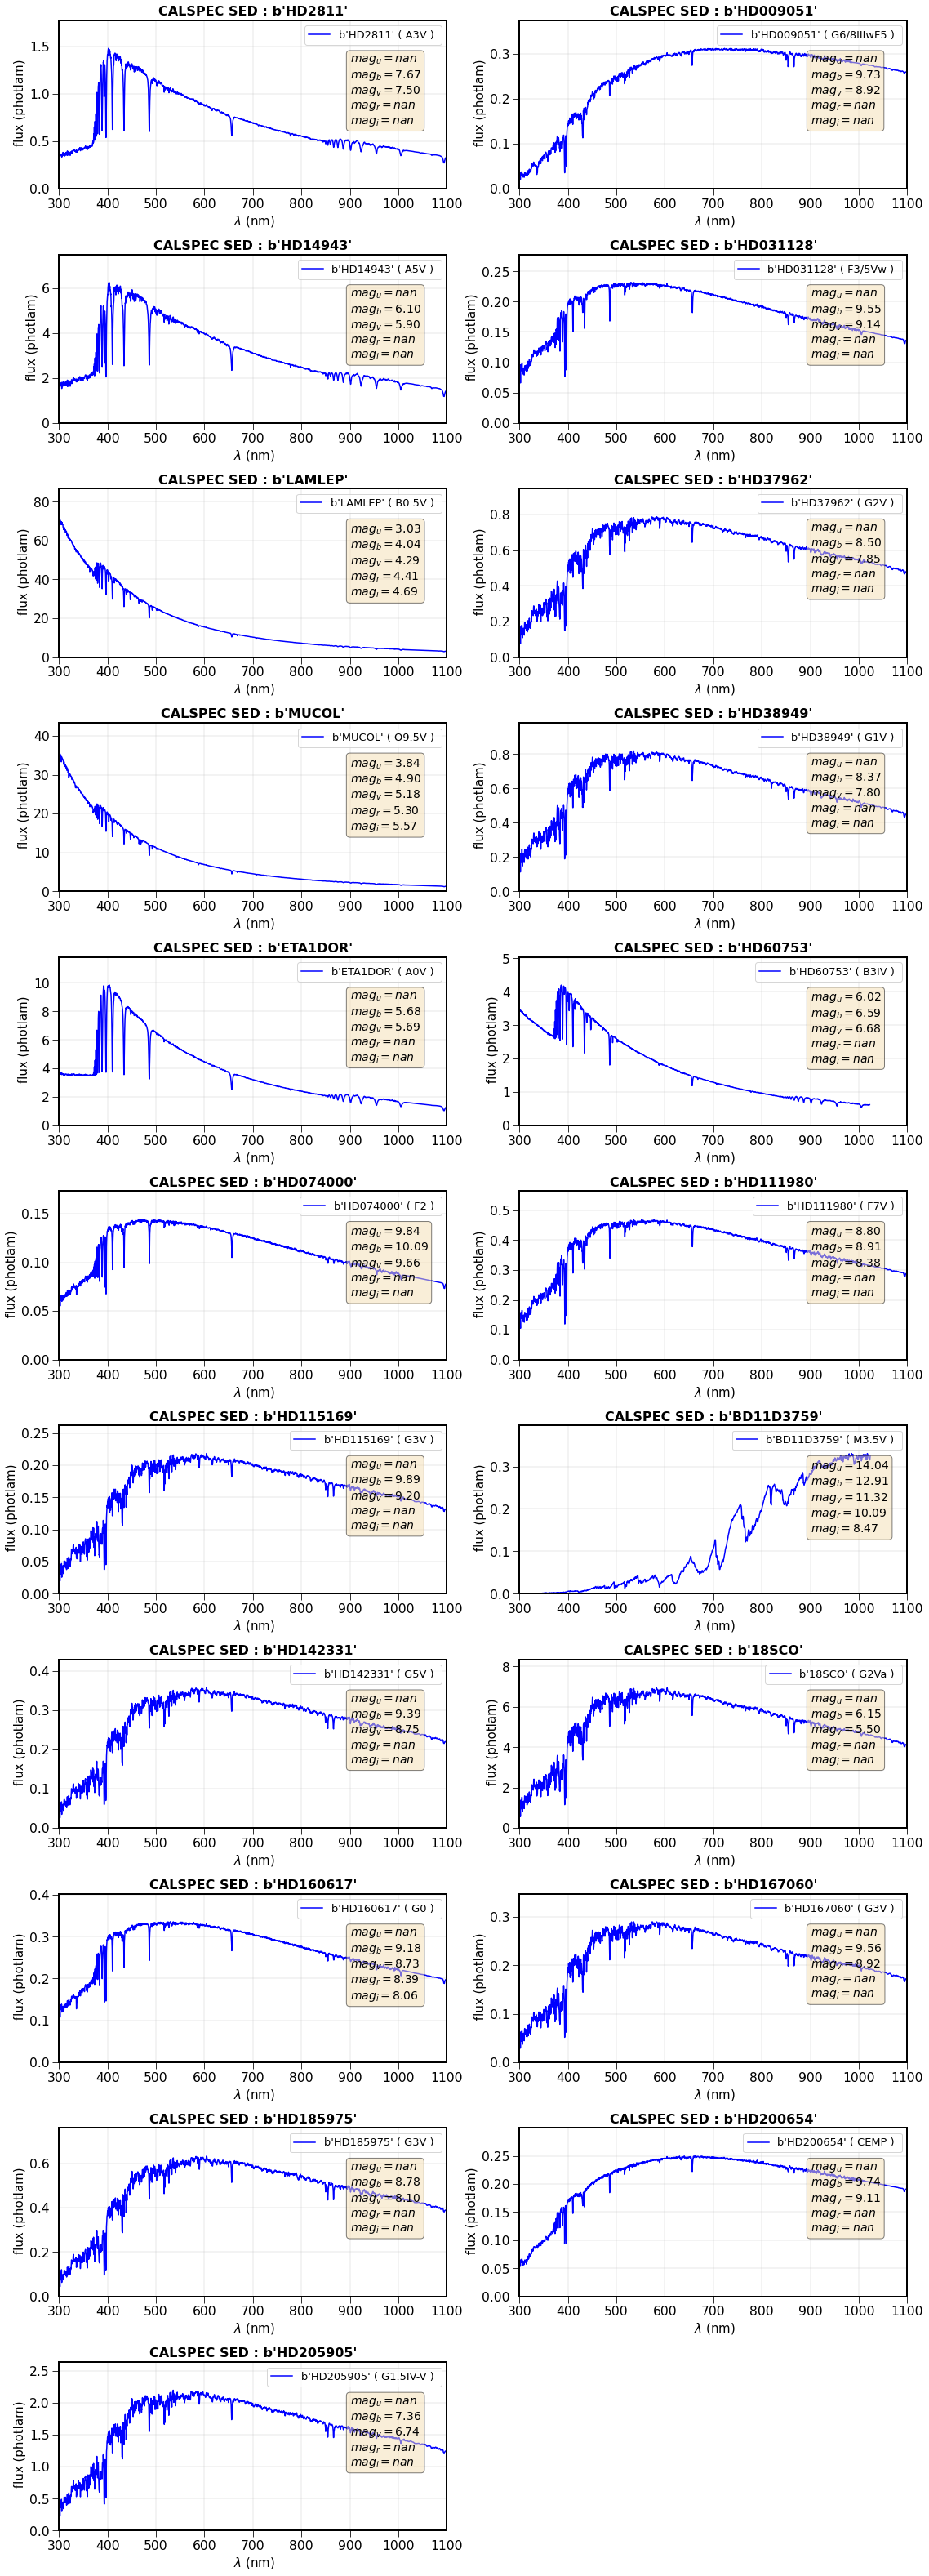

In [24]:
fig=plt.figure(figsize=(Ncol*8,Nrow*4))

count=0

idx=0
for tag_name in List_OfRequired_SED:
    if tag_name in all_objnames:
        idx+=1
        
        
        count+=1
        
        ax=fig.add_subplot(Nrow,Ncol,idx)
        
        filename=t[t["OBJNAME"]==tag_name]["FILES"][0]
    
        
        
        sp_type=t[t["OBJNAME"]==tag_name]["SP_TYPE"][0]
        sp_qual=t[t["OBJNAME"]==tag_name]["SP_QUAL"][0]
        ra=t[t["OBJNAME"]==tag_name]["RA"][0]
        dec=t[t["OBJNAME"]==tag_name]["DEC"][0]
        magU=t[t["OBJNAME"]==tag_name]["magU"][0]
        magB=t[t["OBJNAME"]==tag_name]["magB"][0]
        
        magV=t[t["OBJNAME"]==tag_name]["magV"][0]
        magR=t[t["OBJNAME"]==tag_name]["magR"][0]
        magI=t[t["OBJNAME"]==tag_name]["magI"][0]
        
        fullfilename=os.path.join(path_sed_calspec,filename)
        spec=S.FileSpectrum(fullfilename)
    
        spec.convert('photlam')
        spec.convert('nm')  
        
        
        label=str(tag_name) +" ( " + str(sp_type) + " ) " 
        # + " $ra={:3.2f}°$".format(ra) + " $dec={:3.2f}°$".format(dec)
        ax.plot(spec.wave, spec.flux,color="b",label=label)
        
        textstr = '\n'.join((
        r'$mag_u=%2.2f$' % (magU, ),
        r'$mag_b=%2.2f$' % (magB, ),
        r'$mag_v=%2.2f$' % (magV, ),
        r'$mag_r=%2.2f$' % (magR, ),
        r'$mag_i=%2.2f$' % (magI, )))
        
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.75, 0.8, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
        
        idx_vis=np.where(np.logical_and(spec.wave>300,spec.wave<1100))[0]
        spec_max=spec.flux[idx_vis].max()
        spec_min=0
              
        ax.set_ylim(spec_min,spec_max*1.2)
    
    
        ax.set_xlim(300.,1100.)

        ax.legend()
        ax.grid()

        fign="all_selectedcalspec_spectra_lin.pdf"
        xlabel=' $\\lambda$ ({})'.format(spec.waveunits.name)
        ylabel=' flux ({})'.format(spec.fluxunits.name)
        ax.set_xlabel(xlabel,fontsize=15)
        ax.set_ylabel(ylabel,fontsize=15)
        ax.set_title("CALSPEC SED : "+ str(tag_name))
    else:
        print(">>>>> Missing : ",tag_name)
        
        
        
plt.tight_layout()
plt.savefig(fign)
plt.show()
        
        

In [25]:
NB = count+1

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NB)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NB), alpha=1)

Warning, 33 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 17 of 6234 bins contained negative fluxes; they have been set to zero.
Warning, 34 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 6256 bins contained negative fluxes; they have been set to zero.
Warning, 26 of 6260 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 64 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 1933 bins contained negative fluxes; they have been set to zero.
Warning, 62 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 46 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 28 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 6261 bins contained negative

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_59545/1236622722.py:64: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(themin,themax)


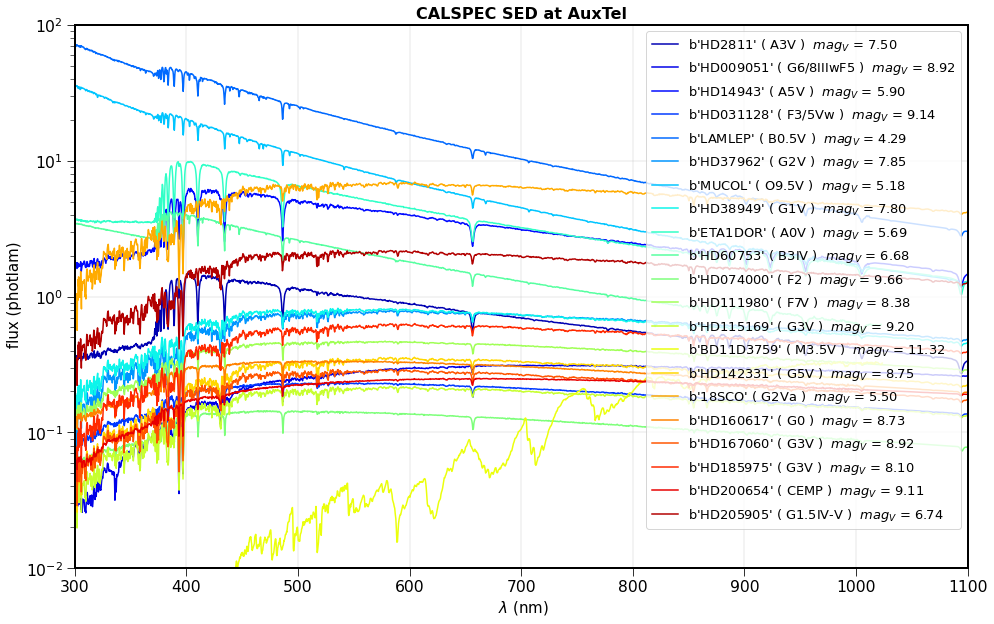

In [26]:
fig=plt.figure(figsize=(16,10))

ax=fig.add_subplot(1,1,1)

idx=0
all_max=[]
all_min=[]
count =0

for tag_name in List_OfRequired_SED:
    if tag_name in all_objnames:
        idx+=1
        count+=1
        
        filename=t[t["OBJNAME"]==tag_name]["FILES"][0]
    
        
        
        sp_type=t[t["OBJNAME"]==tag_name]["SP_TYPE"][0]
        sp_qual=t[t["OBJNAME"]==tag_name]["SP_QUAL"][0]
        ra=t[t["OBJNAME"]==tag_name]["RA"][0]
        dec=t[t["OBJNAME"]==tag_name]["DEC"][0]
        magU=t[t["OBJNAME"]==tag_name]["magU"][0]
        magB=t[t["OBJNAME"]==tag_name]["magB"][0]
        
        magV=t[t["OBJNAME"]==tag_name]["magV"][0]
        magR=t[t["OBJNAME"]==tag_name]["magR"][0]
        magI=t[t["OBJNAME"]==tag_name]["magI"][0]
        
        fullfilename=os.path.join(path_sed_calspec,filename)
        spec=S.FileSpectrum(fullfilename)
    
        spec.convert('photlam')
        spec.convert('nm')  
        
        str_magV = f" $mag_V$ = {magV:.2f}"
        
        label=str(tag_name) +" ( " + str(sp_type) + " ) " + str_magV 
        # + " $ra={:3.2f}°$".format(ra) + " $dec={:3.2f}°$".format(dec)
        ax.semilogy(spec.wave, spec.flux,color=all_colors[count],label=label)
         
        
        idx_vis=np.where(np.logical_and(spec.wave>300,spec.wave<1100))[0]
        spec_max=spec.flux[idx_vis].max()
        spec_min=spec.flux[idx_vis].min()
              
        #ax.set_ylim(spec_min,spec_max*1.2)
        all_max.append(spec_max)
        all_min.append(spec_min)
    
        


    else:
        print(">>>>> Missing : ",tag_name)
        
all_max=np.array(all_max)
themax=all_max.max()

all_min=np.array(all_min)
themin=all_min.min()
        
ax.set_xlim(300.,1100.)
ax.set_ylim(themin,themax)
ax.set_ylim(1e-2,1e2)
ax.set_yscale("log")

ax.legend()
ax.grid()
fign="all_selectedcalspec_spectra_lin_v2.pdf"
xlabel=' $\\lambda$ ({})'.format(spec.waveunits.name)
ylabel=' flux ({})'.format(spec.fluxunits.name)
ax.set_xlabel(xlabel,fontsize=15)
ax.set_ylabel(ylabel,fontsize=15)
ax.set_title("CALSPEC SED at AuxTel")
        
        
#plt.tight_layout()
plt.savefig(fign)
plt.show()
        
        